<a href="https://colab.research.google.com/github/vibhor2mathur/Kaggle/blob/main/Metro_Traffic_Volume_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metro Traffic Volume Predictor

### Importing relevent Libraries and data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
data=pd.read_csv('Train.csv')

### Exploratory data Analysis

In [3]:
data.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [5]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


### Converting date_time to numeric featres

In [6]:
data1=data.copy()

In [7]:
data=data1.copy()

In [8]:
data['date_time']=pd.to_datetime(data['date_time'])

In [9]:
data['year']=data['date_time'].dt.year
data['month']=data['date_time'].dt.month
data['day']=data['date_time'].dt.day
data['time']=data['date_time'].dt.hour
data['weekday']=data['date_time'].dt.weekday

In [10]:
data=data.drop('date_time',axis=1)

In [11]:
data.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,time,weekday
0,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1
1,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1
2,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1
3,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1
4,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1


### EDA on Numerical Feature

### For time of day

In [12]:
data_num=[feature for feature in data.columns if data[feature].dtypes!='O']
data_num

['air_pollution_index',
 'humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'traffic_volume',
 'year',
 'month',
 'day',
 'time',
 'weekday']

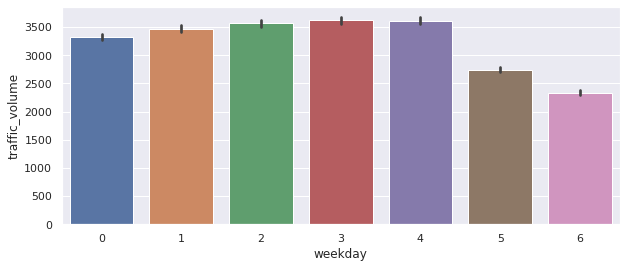

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(x='weekday',y='traffic_volume',data=data)

Weekends are less crowded quite obvious

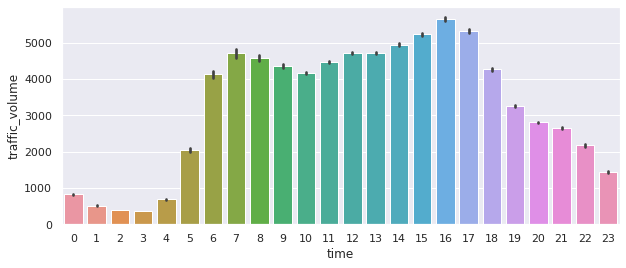

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(x='time',y='traffic_volume',data=data)

More crowded in morning and evening 

### For day of the month

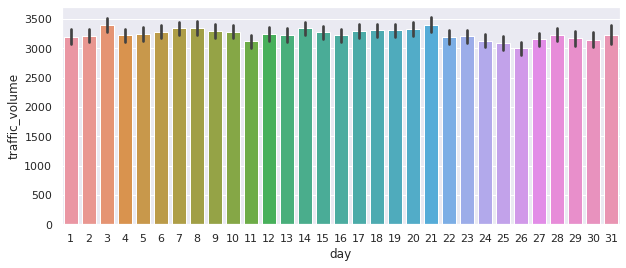

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(x='day',y='traffic_volume',data=data)

### for month of the year

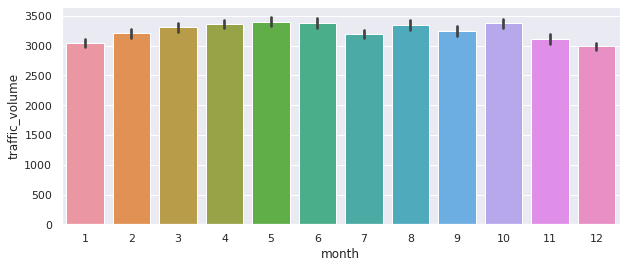

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(x='month',y='traffic_volume',data=data)

Month and day of the month do not matter much

### for recent years

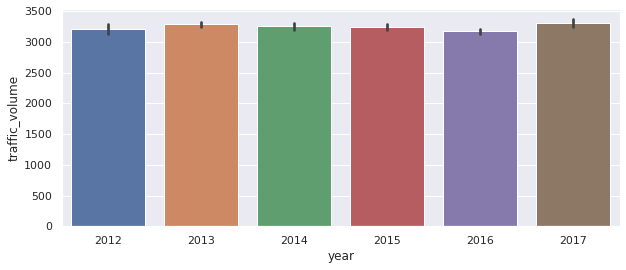

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(x='year',y='traffic_volume',data=data)

In [18]:
data1=data.copy()

In [19]:
data=data1.copy()

### Impact of Temprature

In [20]:
data['temperature'].describe()

count    33750.000000
mean       280.069587
std         13.415256
min          0.000000
25%        271.720000
50%        280.150000
75%        290.620000
max        308.240000
Name: temperature, dtype: float64

In [21]:
data=data[data['temperature']!=0]
#data=data[data['tem']]

In [22]:
data['temperature']=data['temperature']-273.15

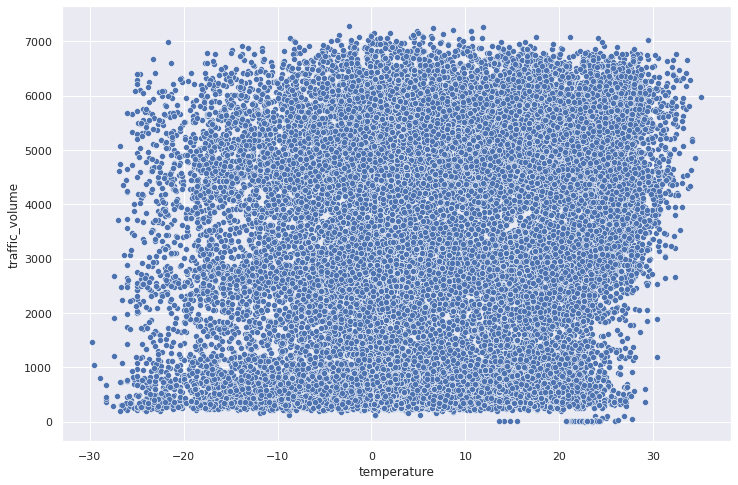

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='temperature',y='traffic_volume',data=data)

More people prefer to travel in warm climate

In [24]:
data['rain_p_h'].describe()

count    33740.000000
mean         0.448872
std         53.534432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_p_h, dtype: float64

### Traffic Volume when it rains

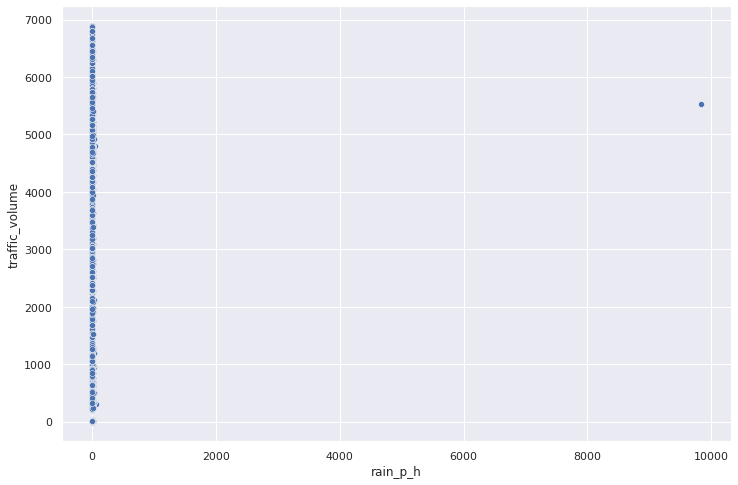

In [25]:
rain_data=data[data['rain_p_h']>0]
plt.figure(figsize=(12,8))
sns.scatterplot(x='rain_p_h',y='traffic_volume',data=rain_data)

### Traffic Volume when snow is present

In [26]:
data['snow_p_h'].describe()

count    33740.000000
mean         0.000318
std          0.009761
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_p_h, dtype: float64

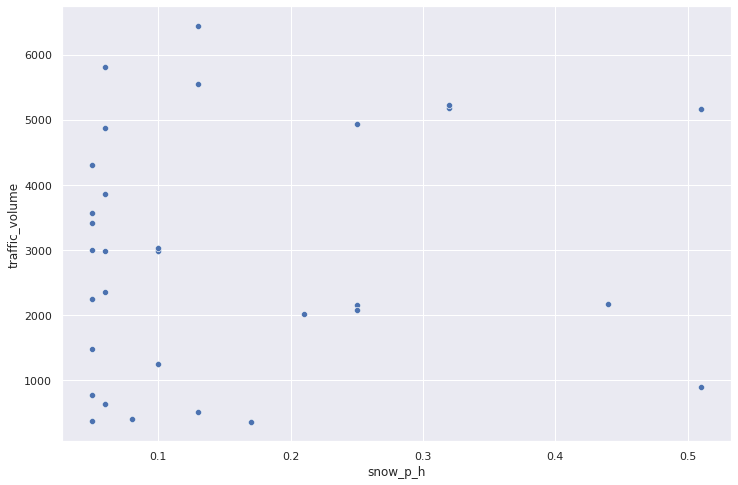

In [27]:
snow_data=data[data['snow_p_h']>0]
plt.figure(figsize=(12,8))
sns.scatterplot(x='snow_p_h',y='traffic_volume',data=snow_data)

Travelling reduces as snow precipitation increases

### EDA on Categorical Data

In [28]:
data_cat=[feature for feature in data.columns if data[feature].dtypes=='O']
data_cat

['is_holiday', 'weather_type', 'weather_description']

In [29]:
data['is_holiday'].value_counts()

None                         33697
New Years Day                    5
Thanksgiving Day                 5
Christmas Day                    5
Labor Day                        4
Veterans Day                     4
Columbus Day                     4
Washingtons Birthday             4
Martin Luther King Jr Day        3
State Fair                       3
Independence Day                 3
Memorial Day                     3
Name: is_holiday, dtype: int64

In [30]:
data['is_holiday'].isnull().sum()

0

In [31]:
data1=data.copy()

In [32]:
data=data1.copy()

In [33]:
temp=[]
for i in data['is_holiday']:
  if i!='None':
    temp.append(1)
  else:
    temp.append(0)

In [34]:
temp=pd.DataFrame(temp)
temp.value_counts()

0    33697
1       43
dtype: int64

In [35]:
data['is_holidy']=temp
data['is_holidy'].value_counts()

0.0    33687
1.0       43
Name: is_holidy, dtype: int64

In [36]:
data=data.fillna(0)

In [37]:
data=data.drop('is_holiday',axis=1)
data.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,time,weekday,is_holidy
0,121,89,2,329,1,1,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1,0.0
1,178,67,3,330,1,1,16.21,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1,0.0
2,113,66,3,329,2,2,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1,0.0
3,20,66,3,329,5,5,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1,0.0
4,281,65,3,329,7,7,17.99,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1,0.0


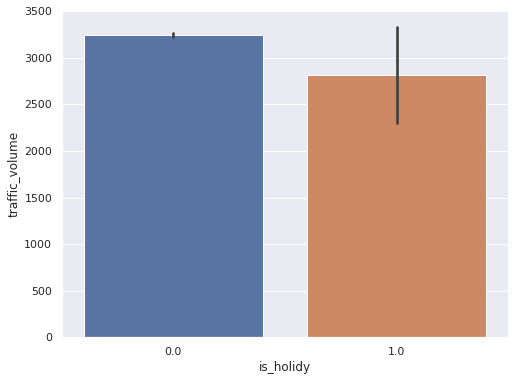

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='is_holidy',y='traffic_volume',data=data)

As expected during holidays people travelling are less

In [39]:
data['weather_type'].value_counts()

Clouds          11213
Clear            9223
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

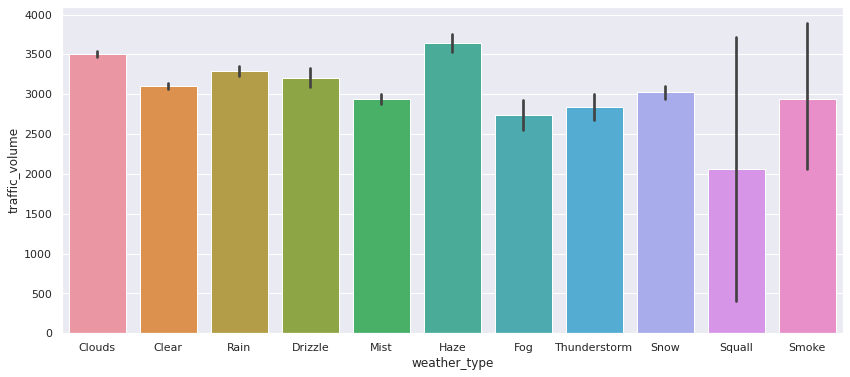

In [40]:
plt.figure(figsize=(14,6))
sns.barplot(x='weather_type',y='traffic_volume',data=data)

Traffic Volume decreases during extreme conditions but not that much so no matter how tough conditions are people will travel in metro mainly working professionals

In [41]:
data['weather_description'].value_counts()

sky is clear                           7514
mist                                   4047
overcast clouds                        3972
broken clouds                          3379
light rain                             2442
scattered clouds                       2294
Sky is Clear                           1709
few clouds                             1568
light snow                             1280
moderate rain                          1105
haze                                    902
light intensity drizzle                 703
heavy snow                              587
fog                                     567
drizzle                                 460
proximity thunderstorm                  345
heavy intensity rain                    311
snow                                    190
thunderstorm                             66
proximity shower rain                    54
thunderstorm with heavy rain             42
heavy intensity drizzle                  40
thunderstorm with light rain    

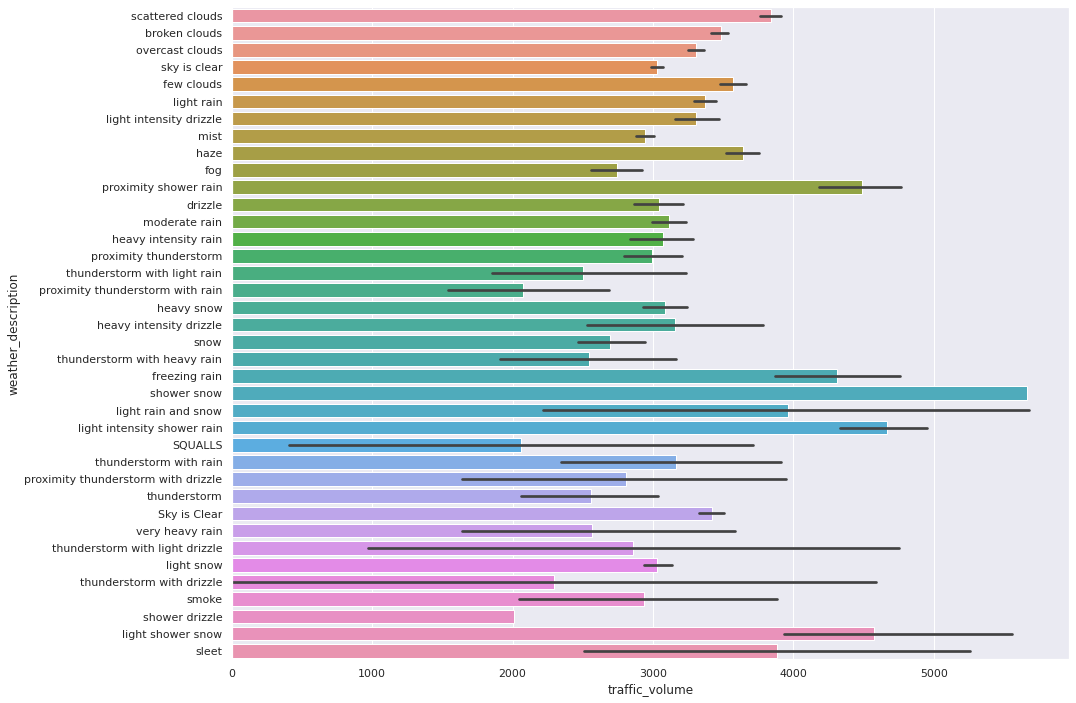

In [42]:
plt.figure(figsize=(15,12))
sns.barplot(y='weather_description',x='traffic_volume',data=data,orient='h')

In [43]:
#data=data.drop('weather_description',axis=1)

In [44]:
data.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,time,weekday,is_holidy
0,121,89,2,329,1,1,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1,0.0
1,178,67,3,330,1,1,16.21,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1,0.0
2,113,66,3,329,2,2,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1,0.0
3,20,66,3,329,5,5,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1,0.0
4,281,65,3,329,7,7,17.99,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1,0.0


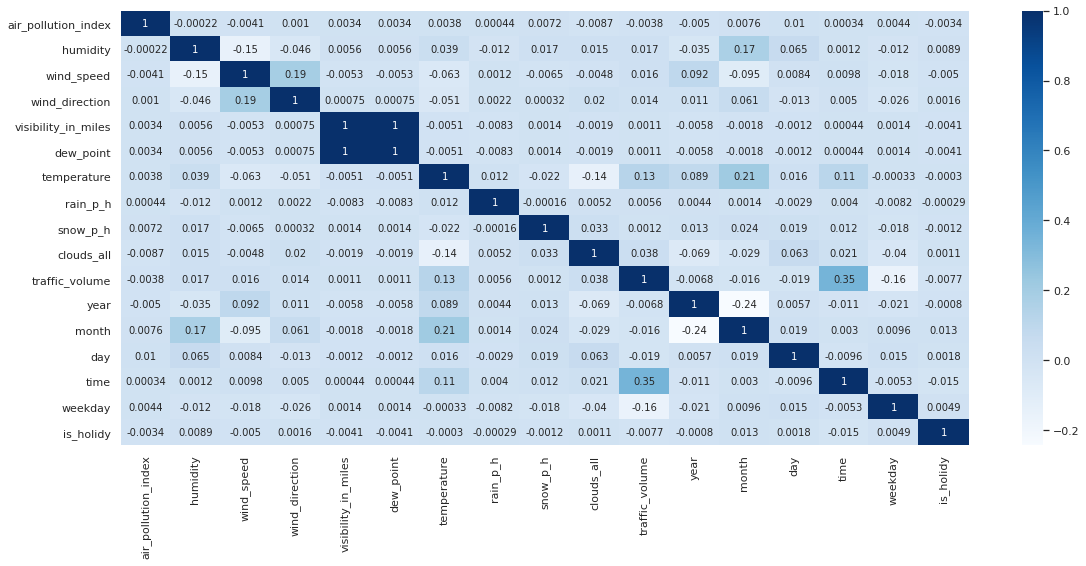

In [45]:
plt.figure(figsize=(19, 8))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

No Strong correlation as we saw before working profesionals have to go office no matter what similarly children will go to school even in small thunder storms

### Transforming Weather Type Categorical data and dropping weather description

In [46]:
data1=data.copy()

In [47]:
data=data1.copy()

In [48]:
data

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,time,weekday,is_holidy
0,121,89,2,329,1,1,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,1,0.0
1,178,67,3,330,1,1,16.21,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,1,0.0
2,113,66,3,329,2,2,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,1,0.0
3,20,66,3,329,5,5,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,1,0.0
4,281,65,3,329,7,7,17.99,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,74,85,1,328,7,7,14.73,0.0,0.0,90,Mist,mist,2348,2017,5,17,21,2,0.0
33746,81,70,1,24,2,2,13.80,0.0,0.0,90,Rain,heavy intensity rain,2194,2017,5,17,22,2,0.0
33747,138,70,1,24,1,1,13.80,0.0,0.0,90,Mist,mist,2194,2017,5,17,22,2,0.0
33748,229,66,1,42,6,6,12.60,0.0,0.0,90,Rain,heavy intensity rain,1328,2017,5,17,23,2,0.0


In [49]:
dummy=pd.get_dummies(data['weather_type'],drop_first=True)

In [50]:
target=data['traffic_volume']

In [51]:
data=data.drop(['traffic_volume','weather_description','weather_type'],axis=1)
data

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,year,month,day,time,weekday,is_holidy
0,121,89,2,329,1,1,15.13,0.0,0.0,40,2012,10,2,9,1,0.0
1,178,67,3,330,1,1,16.21,0.0,0.0,75,2012,10,2,10,1,0.0
2,113,66,3,329,2,2,16.43,0.0,0.0,90,2012,10,2,11,1,0.0
3,20,66,3,329,5,5,16.98,0.0,0.0,90,2012,10,2,12,1,0.0
4,281,65,3,329,7,7,17.99,0.0,0.0,75,2012,10,2,13,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,74,85,1,328,7,7,14.73,0.0,0.0,90,2017,5,17,21,2,0.0
33746,81,70,1,24,2,2,13.80,0.0,0.0,90,2017,5,17,22,2,0.0
33747,138,70,1,24,1,1,13.80,0.0,0.0,90,2017,5,17,22,2,0.0
33748,229,66,1,42,6,6,12.60,0.0,0.0,90,2017,5,17,23,2,0.0


In [52]:
data=pd.concat([data,dummy],axis=1)


In [53]:
data

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,year,month,day,time,weekday,is_holidy,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,121,89,2,329,1,1,15.13,0.0,0.0,40,2012,10,2,9,1,0.0,1,0,0,0,0,0,0,0,0,0
1,178,67,3,330,1,1,16.21,0.0,0.0,75,2012,10,2,10,1,0.0,1,0,0,0,0,0,0,0,0,0
2,113,66,3,329,2,2,16.43,0.0,0.0,90,2012,10,2,11,1,0.0,1,0,0,0,0,0,0,0,0,0
3,20,66,3,329,5,5,16.98,0.0,0.0,90,2012,10,2,12,1,0.0,1,0,0,0,0,0,0,0,0,0
4,281,65,3,329,7,7,17.99,0.0,0.0,75,2012,10,2,13,1,0.0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,74,85,1,328,7,7,14.73,0.0,0.0,90,2017,5,17,21,2,0.0,0,0,0,0,1,0,0,0,0,0
33746,81,70,1,24,2,2,13.80,0.0,0.0,90,2017,5,17,22,2,0.0,0,0,0,0,0,1,0,0,0,0
33747,138,70,1,24,1,1,13.80,0.0,0.0,90,2017,5,17,22,2,0.0,0,0,0,0,1,0,0,0,0,0
33748,229,66,1,42,6,6,12.60,0.0,0.0,90,2017,5,17,23,2,0.0,0,0,0,0,0,1,0,0,0,0


In [54]:
data.isnull().sum()

air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
year                   0
month                  0
day                    0
time                   0
weekday                0
is_holidy              0
Clouds                 0
Drizzle                0
Fog                    0
Haze                   0
Mist                   0
Rain                   0
Smoke                  0
Snow                   0
Squall                 0
Thunderstorm           0
dtype: int64

### Feature scaling and dividing data to train and test

In [55]:
X=data.values
y=target.values
y=y.reshape(-1,1)

In [56]:
print(X.shape,y.shape)

(33740, 26) (33740, 1)


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1)

In [58]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,QuantileTransformer
#sx=QuantileTransformer()
sx=StandardScaler()
#mm=MinMaxScaler
#sy=QuantileTransformer()
sy=StandardScaler()
X_train=sx.fit_transform(X_train)
y_train=sy.fit_transform(y_train)
#y_train=y_train.ravel()
X_test=sx.fit_transform(X_test)


### Using Machine Learning for predictions

### Using SVR

In [85]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

reg=SVR()
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [86]:
r2={'Model':[],'R2 Score':[]}

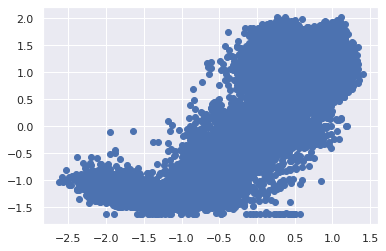

In [87]:
y_pred_train=reg.predict(X_train)
plt.scatter(y_pred_train,y_train)

In [88]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_train=r2_score(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train)
print(r2_train,mae_train,mse_train)

0.7472176677720693 0.367920878667017 0.2527823322279307


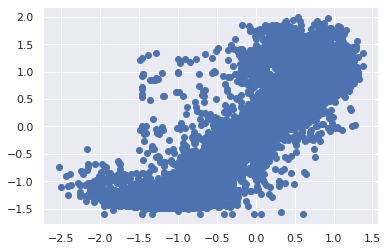

In [89]:
y_pred_test=reg.predict(X_test)
y_test=sy.fit_transform(y_test)
plt.scatter(y_pred_test,y_test)

In [90]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_test=r2_score(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
r2['Model'].append('SVR')
r2['R2 Score'].append(r2_test)
print(r2_test,mae_test,mse_test)

0.692597623555509 0.4107209135381957 0.307402376444491


### Using Linear Regression

In [92]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

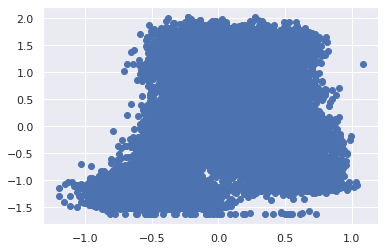

In [93]:
y_pred_train=reg.predict(X_train)
plt.scatter(y_pred_train,y_train)

In [94]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_train=r2_score(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train)
print(r2_train,mae_train,mse_train)

0.16124126755625245 0.8027298206838251 0.8387587324437475


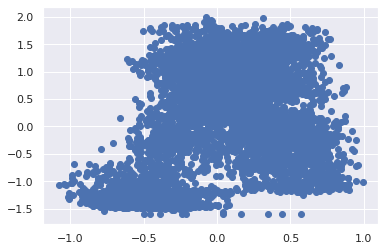

In [96]:
y_pred_test=reg.predict(X_test)
y_test=sy.fit_transform(y_test)
plt.scatter(y_pred_test,y_test)

In [97]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_test=r2_score(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
r2['Model'].append('LinearRegression')
r2['R2 Score'].append(r2_test)
print(r2_test,mae_test,mse_test)

0.1758433483750984 0.7975741866146662 0.8241566516249016


Using Decision Tree

In [99]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

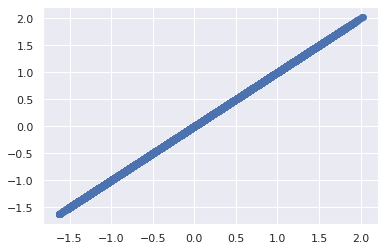

In [100]:
y_pred_train=reg.predict(X_train)
plt.scatter(y_pred_train,y_train)

In [101]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_train=r2_score(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train)
print(r2_train,mae_train,mse_train)

0.9999999979169435 8.249713864283475e-06 2.083056523321261e-09


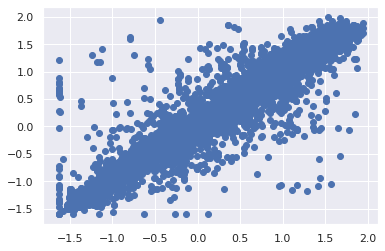

In [102]:
y_pred_test=reg.predict(X_test)
y_test=sy.fit_transform(y_test)
plt.scatter(y_pred_test,y_test)

In [103]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_test=r2_score(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
r2['Model'].append('DecisionTreeRegressor')
r2['R2 Score'].append(r2_test)
print(r2_test,mae_test,mse_test)

0.9130829435716793 0.1538104841966781 0.08691705642832075


Using Random Forest

In [105]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

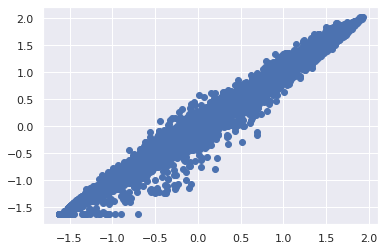

In [106]:
y_pred_train=reg.predict(X_train)
plt.scatter(y_pred_train,y_train)

In [107]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_train=r2_score(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train)
print(r2_train,mae_train,mse_train)

0.9943625544736604 0.04179456132721969 0.005637445526339588


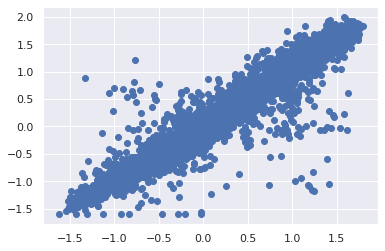

In [108]:
y_pred_test=reg.predict(X_test)
y_test=sy.fit_transform(y_test)
plt.scatter(y_pred_test,y_test)

In [109]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_test=r2_score(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
r2['Model'].append('RandomForestRegressor')
r2['R2 Score'].append(r2_test)
print(r2_test,mae_test,mse_test)

0.951709915408286 0.12085844007744227 0.04829008459171398


In [110]:
r2

{'Model': ['SVR',
  'LinearRegression',
  'DecisionTreeRegressor',
  'RandomForestRegressor'],
 'R2 Score': [0.692597623555509,
  0.1758433483750984,
  0.9130829435716793,
  0.951709915408286]}

### Comparing all Regression Models Results

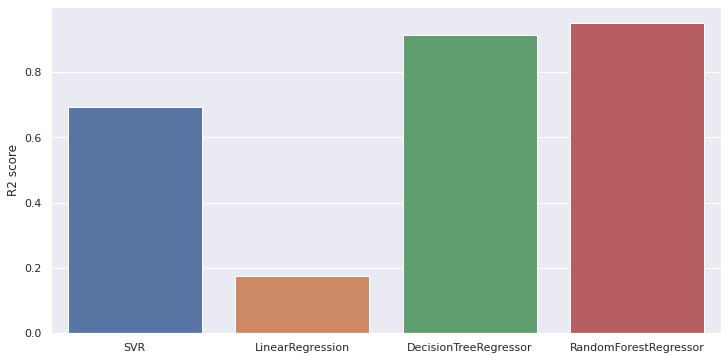

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(x='Model',y='R2 Score',data=r2)
plt.ylabel('R2 score')
plt.show()

So model that fits best on our dataset is **RandomForestRegressor**